# A quick example on how to deal with the data

This notebook serves as a little guidance on how to deal with the reduced brite data. Please look through this carefully, and take note of the comments.

# Features Todo
- ~~point to point scatter~~
- T, 1/T
- ~~Number of datapoints~~
- Time sampling
- ~~Noise~~

In [3]:
#this should always be your starting point on any notebook. Loads the data types
from common import *
%matplotlib notebook

In [4]:
# using the load function, you can load a certain field from your hard drive. It returns a list
# of possible stars, which you can use
stars = load(9)
stars

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 16939 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1068 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 35638 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1213 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 51547 of "

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 22432 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1122 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 46296 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1106 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 36954 of "

[HD 136298,
 HD 136504,
 HD 136664,
 HD 138690,
 HD 139365,
 HD 141556,
 HD 142669,
 HD 143018,
 HD 143118,
 HD 143275,
 HD 144217,
 HD 144294,
 HD 144470,
 HD 145482,
 HD 145502,
 HD 147165,
 HD 148478,
 HD 148688,
 HD 148703,
 HD 149038,
 HD 149404,
 HD 149438,
 HD 151680,
 HD 151804,
 HD 151890,
 HD 151985]

In [5]:
#pick one of the stars you are interested in
star = stars[-2]

In [6]:
#most stars will have a number of subfolders, with multiple reductions in them. Pick the one
#you like
star.results

['all']

In [7]:
#Feed the result you like into the get_data function which loads the data in the Data object
data = star.get_data(star.results[0])

Please choose a dataset by entering a number:
 1): HD151890_09-Sco-I-2015_UBr_1-2-3-4_3_A.ndat
2): HD151890_09-Sco-I-2015_BHr_3_3_3.ndat
3): HD151890_09-Sco-I-2015_BLb_1-2-3-4-5-6_3_A.ndat
4): HD151890_09-Sco-I-2015_UBr_1_2_3_4_3_merged_.ndat
5): HD151890_09-Sco-I-2015_BHr_3_3_A.ndat
6): HD151890_09-Sco-I-2015_UBr_1_2_3_4_3.ndat
7): HD151890_09-Sco-I-2015_BLb_3_4_5_6_3.ndat
8): HD151890_09-Sco-I-2015_BHr_3_3_3_merged_.ndat
9): HD151890_09-Sco-I-2015_BLb_3_4_5_6_3_merged_.ndat
10): HD151890_09-Sco-I-2015_UBr_4_3_A.ndat
11): HD151890_09-Sco-I-2015_BLb_6_3_A.ndat
12): HD151890_09-Sco-I-2015_BLb_1_3_A.ndat
13): HD151890_09-Sco-I-2015_UBr_2_3_A.ndat
14): HD151890_09-Sco-I-2015_UBr_3_3_A.ndat
15): HD151890_09-Sco-I-2015_BHr_3_3_A.ndat
16): HD151890_09-Sco-I-2015_BLb_4_3_A.ndat
17): HD151890_09-Sco-I-2015_BLb_5_3_A.ndat
18): HD151890_09-Sco-I-2015_UBr_1_3_A.ndat
19): HD151890_09-Sco-I-2015_BLb_3_3_A.ndat
20): HD151890_09-Sco-I-2015_BLb_2_3_A.ndat1


<IPython.core.display.Javascript object>


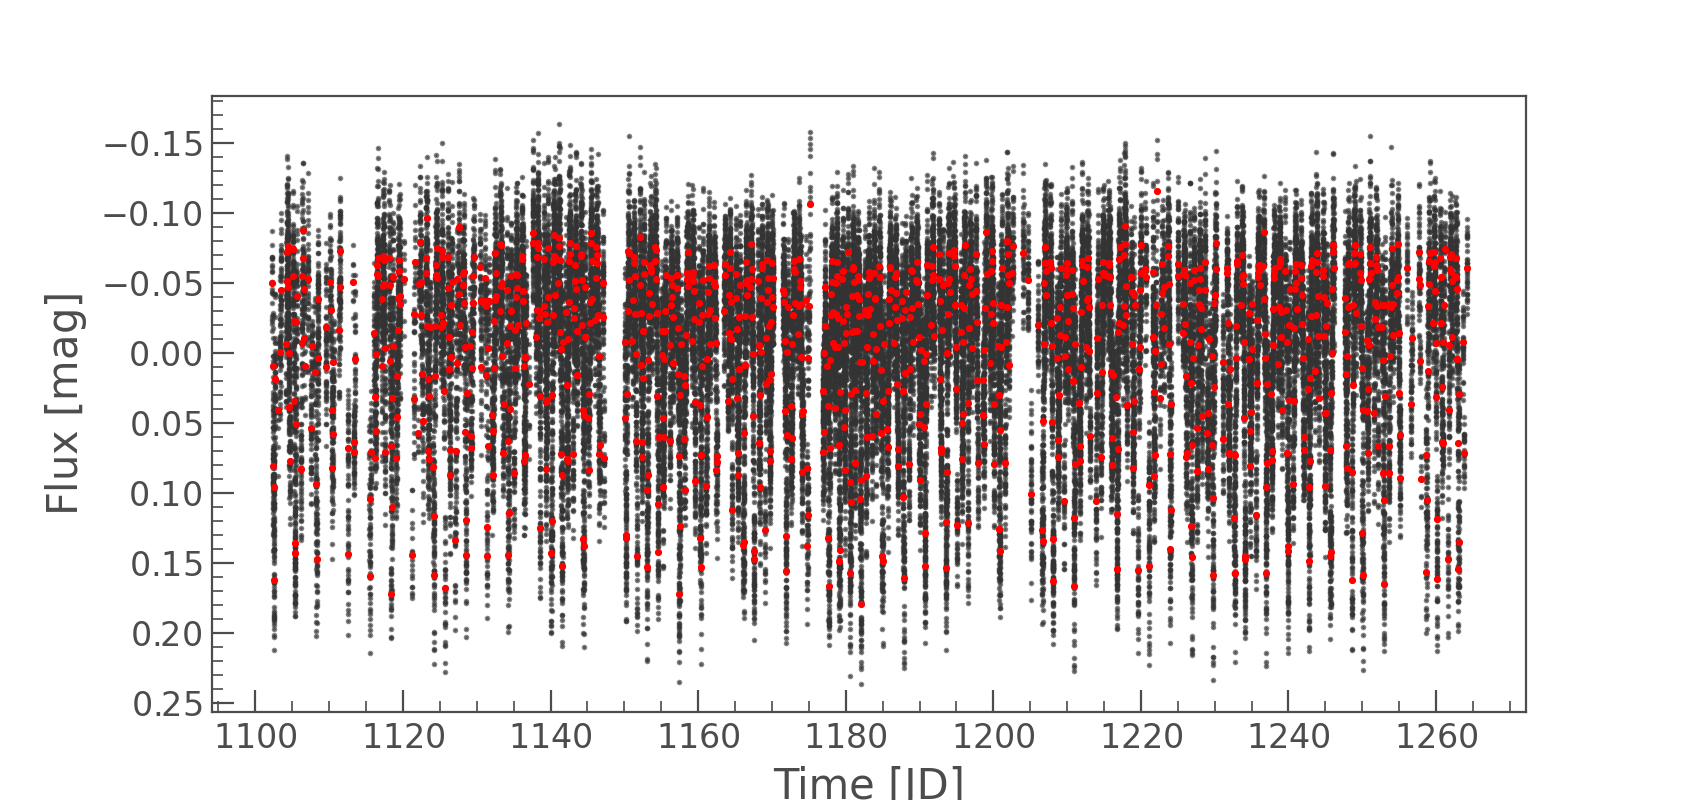

In [8]:
#Now you can plot the data :)
data.scatter()

/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 51547 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


<IPython.core.display.Javascript object>


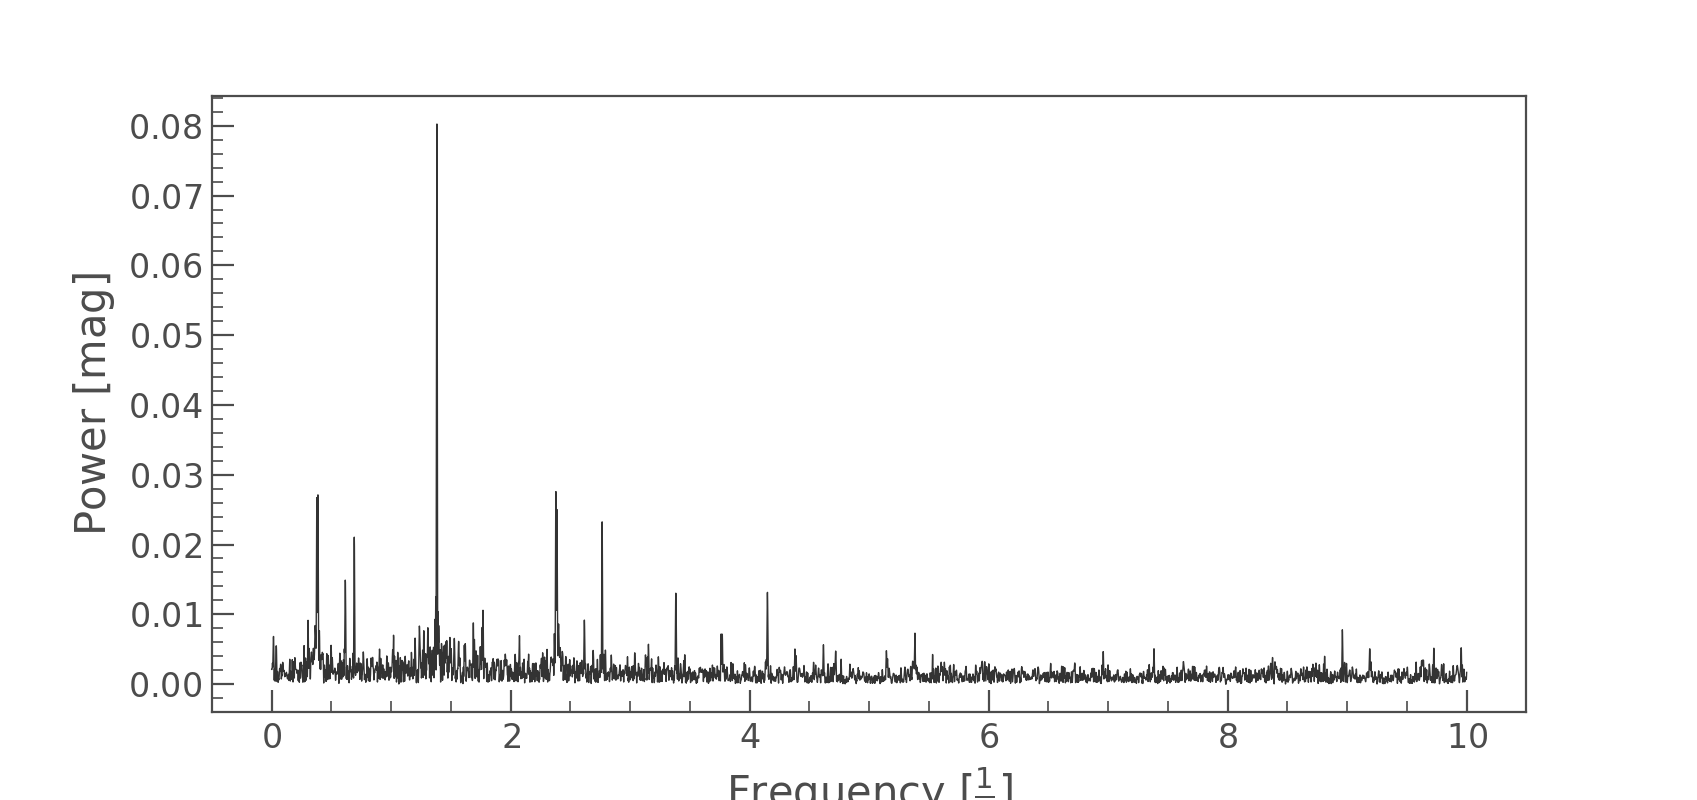

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{mag}$]'>

In [9]:
#You can also convert any given lightcurve into a periodogram
data.to_periodogram().plot()

In [10]:
#You can also easily find out some basic information about any given periodogram
# by using the show_properties function
data.to_periodogram().show_properties()



lightkurve.Periodogram properties:
      Attribute                   Description            Units
---------------------- --------------------------------- -----
                nterms                                 1      
          default_view                         frequency      
             ls_method                              fast      
frequency_at_max_power                            1.3834 1 / d
             max_power                            0.0803   mag
               nyquist                         2824.8588 1 / d
   period_at_max_power                            0.7228     d
             frequency                     array (8096,) 1 / d
                period                     array (8096,)     d
                 power                     array (8096,)   mag
                 label                <class 'NoneType'>      
                  meta <class 'collections.OrderedDict'>      
              targetid                <class 'NoneType'>      


/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 51547 of "dubious year (Note 3)"
  ErfaWarning)
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))
/Users/thomas/Documents/Projects/BRITE/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<IPython.core.display.Javascript object>


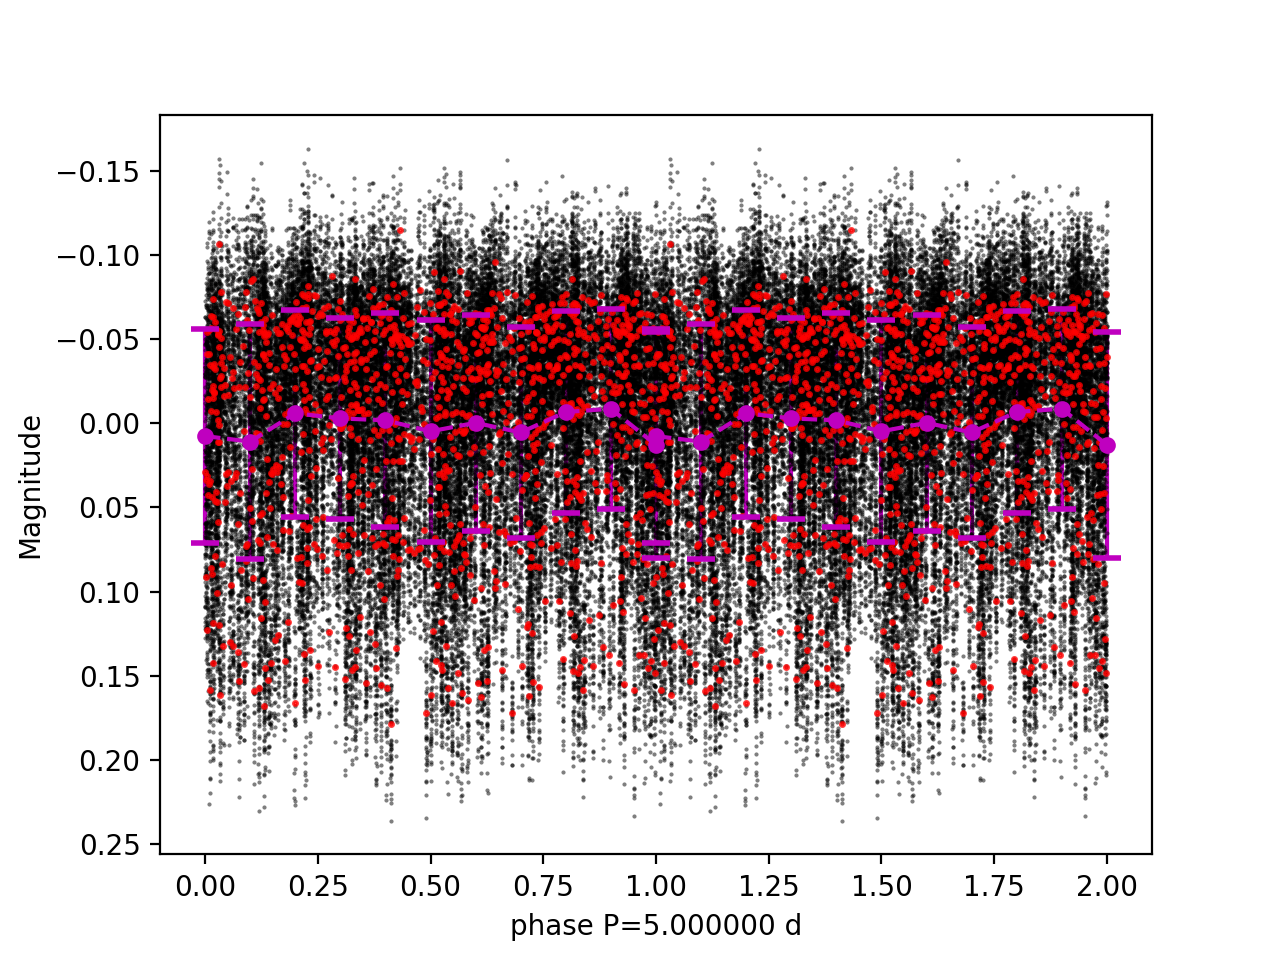

In [11]:
#You can also take a look at simbad for any given star
data.phasephold(period = 5, num_bins=10, show_errors= True)

In [ ]:
#You can also take a look at simbad for any given star
star.simbad

In [ ]:
#get the star type from simbad and spectral type
star.simbad['OTYPE'].value[0],star.simbad['SP_TYPE'].value[0]

In [2]:
#Resulting RMS for a star
data.rms

NameError: name 'data' is not defined

In [ ]:
#Point-to-point scatter
data.ptp_scatter

In [ ]:
#Noise, as computed by the last n points for the periodogram
data.noise(100)

In [ ]:
#Number of datapoints for any given star
data.datapoints

In [ ]:
#You can also easily get the raw data (time,flux, flux_err)
data.raw_data

In [ ]:
data.path

In [ ]:
data

In [ ]:
# You may also want to just create a data object from a path.
# For this you can access the configuration directly (recommended)

config_dict = get_config()
config_dict

In [ ]:
path = os.path.join(config_dict['Decorrelation Path'],'Decorrelations/Field 9/HD_143275/02-06-21_GD/RESULTS/HD143275_09-Sco-I-2015_BAb_2_3_A.ndat')
path

In [ ]:
data = Data(path,None)

In [ ]:
data.scatter()

In [ ]:
data.to_periodogram().plot()